# Analysis

In [32]:
import pandas as pd

In [33]:
from google.cloud import bigquery
from google.oauth2 import service_account
credentials = service_account.Credentials.from_service_account_file(
'../.keys/sctp-data-eng-ecomm-5e533c859ea1.json')

project_id = 'sctp-data-eng-ecomm'
client = bigquery.Client(credentials= credentials,project=project_id)

In [34]:
query_job = client.query("""
   SELECT *
   FROM ecomm_dev.fact_order_items
   LIMIT 1000 """)

In [35]:
# Convert results to a Pandas DataFrame
df = query_job.to_dataframe()

# Display the DataFrame
print(df.head())

/home/esther/miniconda3/envs/elt_bigq/lib/python3.10/site-packages/google/cloud/bigquery/table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


                           order_id  order_item_id  \
0  d455a8cb295653b55abda06d434ab492              1   
1  9dc8d1a6f16f1b89874c29c9d8d30447              1   
2  7f39ba4c9052be115350065d07583cac              1   
3  fc8cfb0445794a015aae85ee6bdcf12b              1   
4  226e16e7eb6dcefe180d80127468de8b              2   

                         product_id                         seller_id  \
0  a2ff5a97bf95719e38ea2e3b4105bce8  0015a82c2db000af6aaaf3ae2ecb0532   
1  a2ff5a97bf95719e38ea2e3b4105bce8  0015a82c2db000af6aaaf3ae2ecb0532   
2  a2ff5a97bf95719e38ea2e3b4105bce8  0015a82c2db000af6aaaf3ae2ecb0532   
3  08574b074924071f4e201e151b152b4e  001cca7ae9ae17fb1caed9dfb1094831   
4  08574b074924071f4e201e151b152b4e  001cca7ae9ae17fb1caed9dfb1094831   

  shipping_limit_date  price  freight_value                       customer_id  \
0 2017-10-12 22:24:16  895.0          21.02  944b72539d7e1f7f7fc6e46639ef1fe3   
1 2017-10-18 14:49:22  895.0          21.02  d9442164acf4b03109425633efaa0

In [39]:
query = """
WITH merged_orders_payments AS (
  SELECT
    o.order_id,
    o.customer_id,
    o.order_status,
    o.order_purchase_timestamp,
    p.payment_type,
    p.payment_installments,
    p.payment_value
  FROM
    `sctp-data-eng-ecomm.ecomm_dev.stg_orders` o
  JOIN
    `sctp-data-eng-ecomm.ecomm_dev.stg_payments` p
  ON
    o.order_id = p.order_id
),
monthly_sales AS (
  SELECT
    FORMAT_DATE('%Y-%m', DATE(order_purchase_timestamp)) AS order_month,
    SUM(payment_value) AS total_sales
  FROM
    merged_orders_payments
  GROUP BY
    order_month
  ORDER BY
    order_month
)
SELECT * FROM monthly_sales;
"""

from google.cloud import bigquery
client = bigquery.Client()
df = client.query(query).to_dataframe()
df.head()


/home/esther/miniconda3/envs/elt_bigq/lib/python3.10/site-packages/google/cloud/bigquery/table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,order_month,total_sales
0,2016-10,47271.20
1,2016-12,19.62
2,2017-01,127545.67
3,2017-02,271298.65
4,2017-03,414369.39


In [57]:
from google.cloud import bigquery

client = bigquery.Client(project="sctp-data-eng-ecomm")

query = """
SELECT
  product_category_name,
  SUM(price) AS total_sales
FROM
  `sctp-data-eng-ecomm.ecomm_dev.fact_order_items`
WHERE
  product_category_name IS NOT NULL
GROUP BY
  product_category_name
ORDER BY
  total_sales DESC
LIMIT 10;
"""

df = client.query(query).to_dataframe()
print(df)





/home/esther/miniconda3/envs/elt_bigq/lib/python3.10/site-packages/google/cloud/bigquery/table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


   product_category_name  total_sales
0          health_beauty   1072073.26
1          watches_gifts    943048.51
2         sports_leisure    830866.95
3         bed_bath_table    758363.84
4  computers_accessories    725319.46
5             housewares    567537.95
6             cool_stuff    567490.86
7        furniture_decor    526951.21
8                   auto    502797.97
9                   toys    450894.30


In [ ]:
from google.cloud import bigquery

client = bigquery.Client(project="sctp-data-eng-ecomm")

query = """
SELECT
  FORMAT_TIMESTAMP('%A',order_purchase_timestamp) AS day_of_week,
  SUM(price) AS total_sales
FROM
  `sctp-data-eng-ecomm.ecomm_dev.fact_order_items`
WHERE
  order_purchase_timestamp IS NOT NULL
  AND price IS NOT NULL
GROUP BY
  day_of_week
ORDER BY
  total_sales DESC
LIMIT 7;
"""

df = client.query(query).to_dataframe()
print(df)






In [76]:
from google.cloud import bigquery

client = bigquery.Client()

query = """
SELECT
  payment_type,
  COUNT(*) AS transaction_count
FROM
  `sctp-data-eng-ecomm.ecomm_dev.fact_order_items`
WHERE
  payment_type IS NOT NULL
GROUP BY
  payment_type
ORDER BY
  transaction_count DESC
"""

df = client.query(query).to_dataframe()
print(df)


/home/esther/miniconda3/envs/elt_bigq/lib/python3.10/site-packages/google/cloud/bigquery/table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


  payment_type  transaction_count
0  credit_card              74585
1       boleto              19191
2      voucher               5489
3   debit_card               1485


In [87]:
from google.cloud import bigquery

client = bigquery.Client(project="sctp-data-eng-ecomm")

query = """
SELECT
  product_category_name,
  SUM(price) AS total_sales
FROM
  `sctp-data-eng-ecomm.ecomm_dev.fact_order_items`
WHERE
  product_category_name IS NOT NULL
GROUP BY
  product_category_name
ORDER BY
  total_sales DESC
LIMIT 10;
"""

df = client.query(query).to_dataframe()
print(df)





/home/esther/miniconda3/envs/elt_bigq/lib/python3.10/site-packages/google/cloud/bigquery/table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


   product_category_name  total_sales
0          health_beauty   1072073.26
1          watches_gifts    943048.51
2         sports_leisure    830866.95
3         bed_bath_table    758363.84
4  computers_accessories    725319.46
5             housewares    567537.95
6             cool_stuff    567490.86
7        furniture_decor    526951.21
8                   auto    502797.97
9                   toys    450894.30


/home/esther/miniconda3/envs/elt_bigq/lib/python3.10/site-packages/google/cloud/bigquery/table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


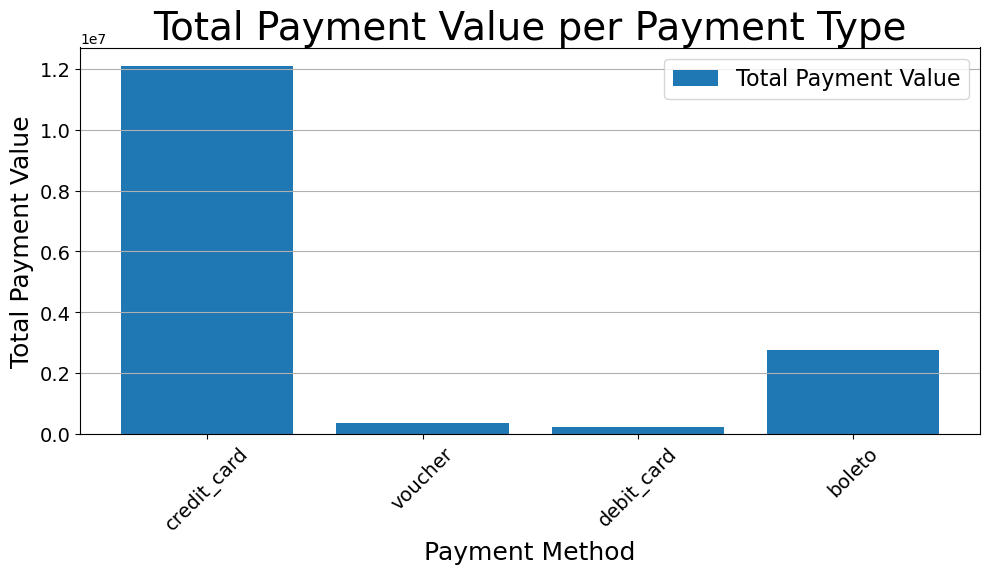

In [92]:
# Total Payment Value by Type

from google.cloud import bigquery
import matplotlib.pyplot as plt
import pandas as pd

client = bigquery.Client()


query1 = """
SELECT payment_type, SUM(payment_value) AS total_payment_value
FROM `sctp-data-eng-ecomm.ecomm_dev.fact_order_items`
GROUP BY payment_type
"""
df1 = client.query(query1).to_dataframe()
df1_clean = df1.dropna(subset=["payment_type", "total_payment_value"])

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df1_clean["payment_type"], df1_clean["total_payment_value"], label="Total Payment Value")

plt.title("Total Payment Value per Payment Type", fontsize=28)
plt.xlabel("Payment Method", fontsize=18)
plt.ylabel("Total Payment Value", fontsize=18)

plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

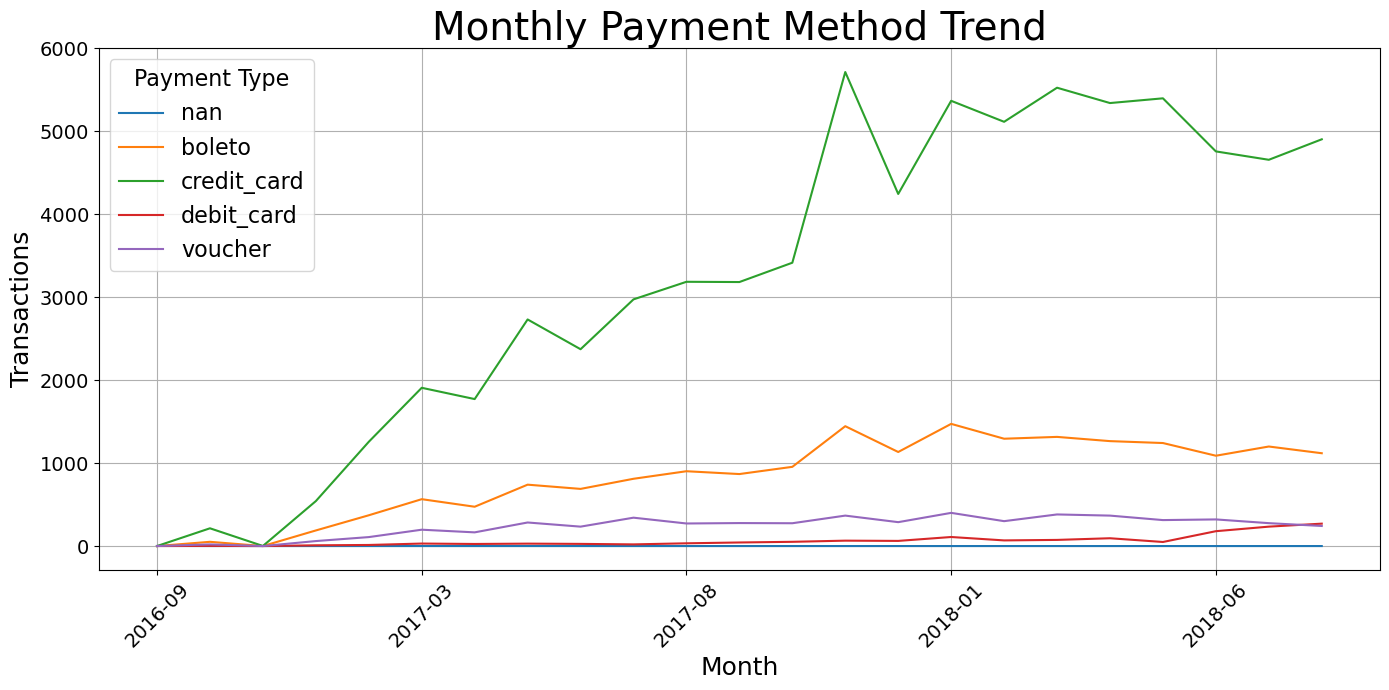

In [ ]:
# Monthly Usage Trend
query2 = """
SELECT
  FORMAT_TIMESTAMP('%Y-%m', order_purchase_timestamp) AS month,
  payment_type,
  COUNT(*) AS transaction_count
FROM `sctp-data-eng-ecomm.ecomm_dev.fact_order_items`
WHERE order_purchase_timestamp IS NOT NULL
GROUP BY month, payment_type
ORDER BY month, payment_type
"""
df2 = client.query(query2).to_dataframe()

pivot = df2.pivot(index="month", columns="payment_type", values="transaction_count").fillna(0)

ax = pivot.plot(kind="line", figsize=(14, 7))
plt.title("Monthly Payment Method Trend", fontsize=28)
plt.xlabel("Month", fontsize=18)
plt.ylabel("Transactions", fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title="Payment Type", fontsize=16, title_fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


/home/esther/miniconda3/envs/elt_bigq/lib/python3.10/site-packages/google/cloud/bigquery/table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


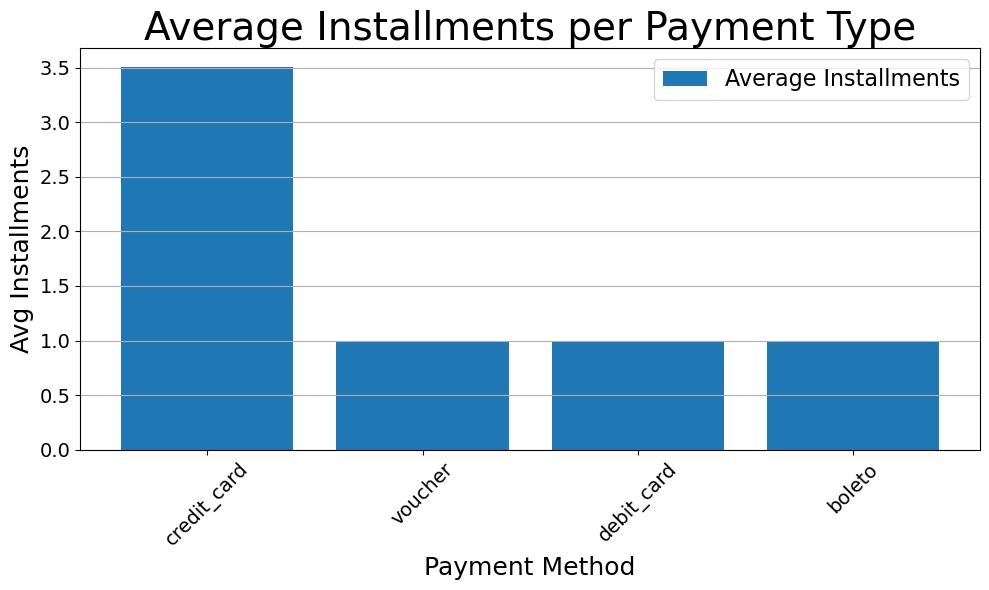

In [88]:
# Average Installments
query3 = """
SELECT
  payment_type,
  AVG(payment_installments) AS avg_installments
FROM `sctp-data-eng-ecomm.ecomm_dev.fact_order_items`
WHERE payment_installments IS NOT NULL
GROUP BY payment_type
"""
df3 = client.query(query3).to_dataframe()

plt.figure(figsize=(10, 6))
bars = plt.bar(df3["payment_type"], df3["avg_installments"], label="Average Installments")

plt.title("Average Installments per Payment Type", fontsize=28)
plt.xlabel("Payment Method", fontsize=18)
plt.ylabel("Avg Installments", fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



/home/esther/miniconda3/envs/elt_bigq/lib/python3.10/site-packages/google/cloud/bigquery/table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


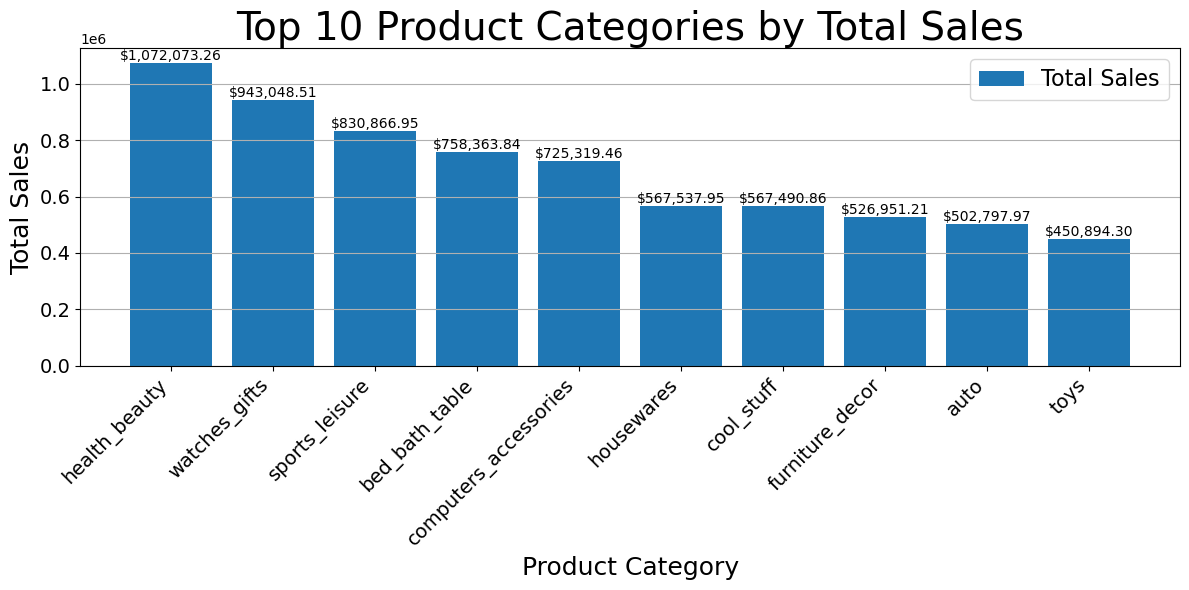

In [ ]:
# Top 10 categories by sales

from google.cloud import bigquery
import matplotlib.pyplot as plt

client = bigquery.Client()

query = """
SELECT
  product_category_name,
  SUM(price) AS total_sales
FROM
   `sctp-data-eng-ecomm.ecomm_dev.fact_order_items`
WHERE
  product_category_name IS NOT NULL
GROUP BY
  product_category_name
ORDER BY
  total_sales DESC
LIMIT 10;
"""

df = client.query(query).to_dataframe()

plt.figure(figsize=(12, 6))
bars = plt.bar(df["product_category_name"], df["total_sales"], label="Total Sales")

plt.title("Top 10 Product Categories by Total Sales", fontsize=28)
plt.xlabel("Product Category", fontsize=18)
plt.ylabel("Total Sales", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.grid(axis='y')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 100,
             f"${height:,.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


/home/esther/miniconda3/envs/elt_bigq/lib/python3.10/site-packages/google/cloud/bigquery/table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


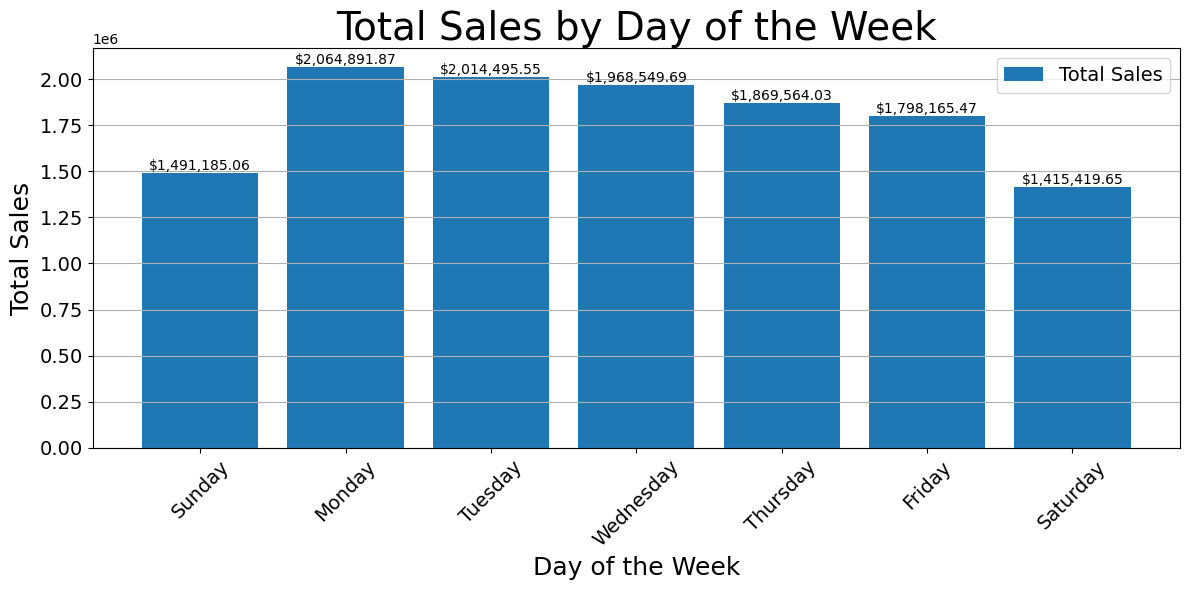

In [98]:
#Sales by Day of the Week

from google.cloud import bigquery
import matplotlib.pyplot as plt

client = bigquery.Client()

query = """
WITH daily_sales AS (
  SELECT
    FORMAT_TIMESTAMP('%A', order_purchase_timestamp) AS day_of_week,
    EXTRACT(DAYOFWEEK FROM order_purchase_timestamp) AS weekday_number,
    SUM(price) AS total_sales
   FROM
   `sctp-data-eng-ecomm.ecomm_dev.fact_order_items`
  WHERE
    order_purchase_timestamp IS NOT NULL
    AND price IS NOT NULL
  GROUP BY
    day_of_week, weekday_number
)
SELECT
  day_of_week,
  total_sales
FROM
  daily_sales
ORDER BY
  weekday_number;
"""

df = client.query(query).to_dataframe()


plt.figure(figsize=(12, 6))
bars = plt.bar(df["day_of_week"], df["total_sales"], label="Total Sales")

plt.title("Total Sales by Day of the Week", fontsize=28)
plt.xlabel("Day of the Week", fontsize=18)
plt.ylabel("Total Sales", fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid(axis='y')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 100,
             f"${height:,.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


/home/esther/miniconda3/envs/elt_bigq/lib/python3.10/site-packages/google/cloud/bigquery/table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


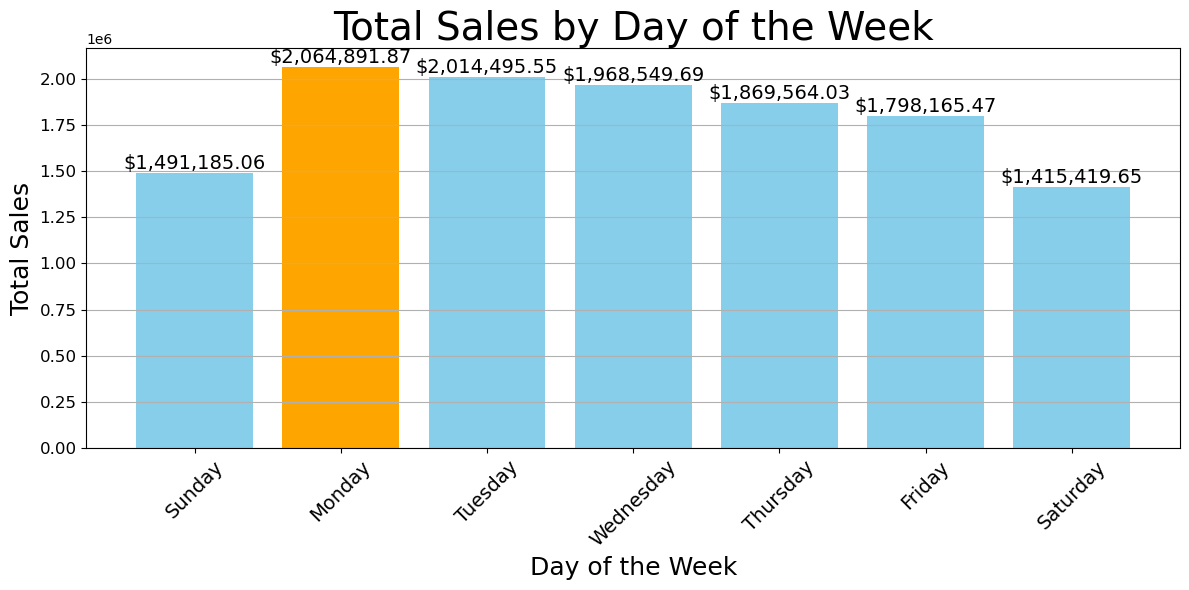

In [103]:
#Sales by Day of the Week 

from google.cloud import bigquery
import matplotlib.pyplot as plt

# Run the BigQuery query
client = bigquery.Client()

query = """
WITH daily_sales AS (
  SELECT
    FORMAT_TIMESTAMP('%A', order_purchase_timestamp) AS day_of_week,
    EXTRACT(DAYOFWEEK FROM order_purchase_timestamp) AS weekday_number,
    SUM(price) AS total_sales
  FROM
    `sctp-data-eng-ecomm.ecomm_dev.fact_order_items`
  WHERE
    order_purchase_timestamp IS NOT NULL
    AND price IS NOT NULL
  GROUP BY
    day_of_week, weekday_number
)
SELECT
  day_of_week,
  total_sales
FROM
  daily_sales
ORDER BY
  weekday_number;
"""

df = client.query(query).to_dataframe()

# Identify the day with the highest sales
top_day = df.loc[df["total_sales"].idxmax(), "day_of_week"]

# Create color list: highlight top day in a different color
colors = ["skyblue" if day != top_day else "orange" for day in df["day_of_week"]]

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(df["day_of_week"], df["total_sales"], color=colors, label="Total Sales")

# Formatting
plt.title("Total Sales by Day of the Week", fontsize=28)
plt.xlabel("Day of the Week", fontsize=18)
plt.ylabel("Total Sales", fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=12)
plt.grid(axis='y')

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 100,
             f"${height:,.2f}", ha='center', va='bottom', fontsize=14)

plt.tight_layout()
plt.show()
